In [20]:
import numpy as np
from astropy.io import ascii
from scipy import spatial
from cicTools import *

# Read Galaxies
gxs = readTNG()
lbox = 205000 #kpc
gxs.remove_row(np.where(gxs['y']==lbox)[0][0])
gxs.remove_row(np.where(gxs['x']<0.)[0][0])
rho_mean = len(gxs)/lbox**3
print('n:',len(gxs))
print('rho_mean:',rho_mean)

# Create cKDTree
tree = spatial.cKDTree(data=np.column_stack((gxs['x'],gxs['y'],gxs['z'])),boxsize=lbox)

n: 13333604
n_mean: 1.5476971024796505e-09


n_voids: 174


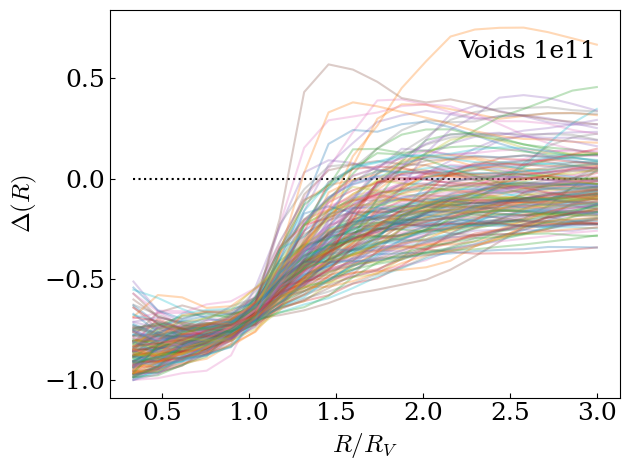

In [47]:
import matplotlib.pyplot as plt
import seaborn
fs = 18
ms = 10
plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams["axes.labelsize"] = fs
#plt.rcParams["ylabel.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

nbins = 20

# Read Voids
voidsfile = '../data/voids_1e11.dat'
voids = ascii.read(voidsfile,\
    names=['r','x','y','z','vx','vy','vz',\
        'deltaint_1r','maxdeltaint_2-3r','log10Poisson','Nrecenter'])
voids = voids[voids['r']>=9.]
print('n_voids:',len(voids))


for nv in range(len(voids)):
    rv, xv, yv, zv = voids[nv]['r']*1000., voids[nv]['x']*1000., voids[nv]['y']*1000., voids[nv]['z']*1000.
    Delta = np.zeros(nbins)
    rs = np.linspace(rv/3, rv*3, nbins)
    for i,r in enumerate(rs):
        n = len(tree.query_ball_point([xv,yv,zv],r))
        V = (4./3)*np.pi*r**3
        rho = n/V
        Delta[i] = (rho-rho_mean)/rho_mean

    plt.plot(rs/rv,Delta,alpha=.3)
plt.hlines(0,1./3,3.,ls=':',color='k')
plt.xlabel(r'$R/R_V$')
plt.ylabel(r'$\Delta(R)$')
plt.text(2.2,0.6,'Voids 1e11',fontsize=fs)
plt.tight_layout()
plt.savefig('../plots/voids_profiles_1e11.png')
plt.show()


n_voids: 82


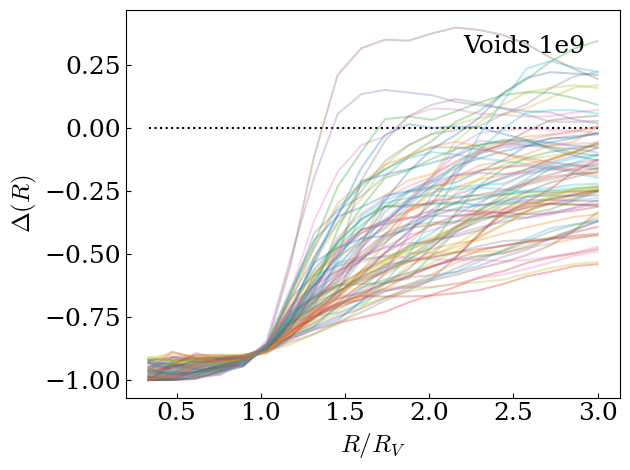

In [48]:
import matplotlib.pyplot as plt
import seaborn
fs = 18
ms = 10
plt.rcParams["xtick.labelsize"] = fs
plt.rcParams["ytick.labelsize"] = fs
plt.rcParams["axes.labelsize"] = fs
#plt.rcParams["ylabel.labelsize"] = fs
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.direction"] = 'in'

nbins = 20

# Read Voids
voidsfile = '../data/voids_1e9.dat'
voids = ascii.read(voidsfile,\
    names=['r','x','y','z','vx','vy','vz',\
        'deltaint_1r','maxdeltaint_2-3r','log10Poisson','Nrecenter'])
voids = voids[voids['r']>=7.]
print('n_voids:',len(voids))


for nv in range(len(voids)):
    rv, xv, yv, zv = voids[nv]['r']*1000., voids[nv]['x']*1000., voids[nv]['y']*1000., voids[nv]['z']*1000.
    Delta = np.zeros(nbins)
    rs = np.linspace(rv/3, rv*3, nbins)
    for i,r in enumerate(rs):
        n = len(tree.query_ball_point([xv,yv,zv],r))
        V = (4./3)*np.pi*r**3
        rho = n/V
        Delta[i] = (rho-rho_mean)/rho_mean

    plt.plot(rs/rv,Delta,alpha=.3)
plt.hlines(0,1./3,3.,ls=':',color='k')
plt.xlabel(r'$R/R_V$')
plt.ylabel(r'$\Delta(R)$')
plt.text(2.2,0.3,'Voids 1e9',fontsize=fs)
plt.tight_layout()
plt.savefig('../plots/voids_profiles_1e9.png')

plt.show()
